---
# Mini Project of	Neural Networks
---

###Objective:
###Implement a deep learning model to solve a traffic-related problem, applying neural networks for tasks such as traffic sign recognition, vehicle detection, or traffic flow analysis.


## Step 1: Import Data
Begin by importing the necessary libraries.

In [1]:
# Import all the libraries we want it
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Step 2: Load and Preprocess Data

In [2]:
%pip install opendatasets --upgrade

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: haya_almalki
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage


100%|██████████| 249M/249M [00:01<00:00, 163MB/s]


In [4]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20)

In [5]:
# Here is for Load and
train_generator = datagen.flow_from_directory('/content/accident-detection-from-cctv-footage/data/train', target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = datagen.flow_from_directory('/content/accident-detection-from-cctv-footage/data/val', target_size=(150,150), batch_size=32, class_mode='binary')
testing_generator = datagen.flow_from_directory('/content/accident-detection-from-cctv-footage/data/test', target_size=(150,150), batch_size=32, class_mode='binary')


Found 791 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


###Step 3: (EDA)	preprocessing

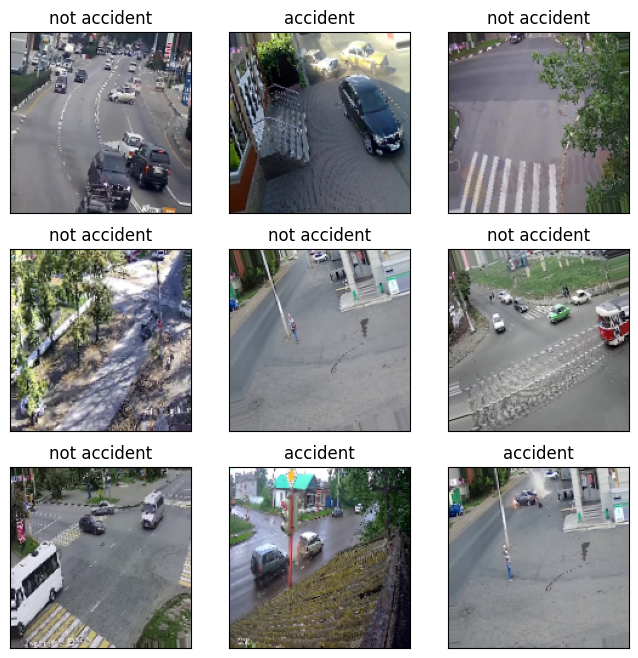

In [6]:
# display images and labels from the train generator
images, labels = next(train_generator)
label_names = {0: 'accident', 1: 'not accident'}

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i])
    plt.title(label_names[int(labels[i])])  # label
    plt.xticks([])
    plt.yticks([])
plt.show()

## Step 4: the ANN Model

4.1Build the ANN MODEL
*   List item
*   List item


Define the architecture of your ANN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.



In [7]:
# Here is the define the model
ANN_model = Sequential()

# Here is the input layer with flatten the image to 1D
ANN_model.add(Flatten(input_shape=(150, 150, 3)))

# Here is the hidden layers
ANN_model.add(Dense(units=128, activation='relu'))
ANN_model.add(Dense(units=64, activation='relu'))

# Here is the output layer
ANN_model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
ANN_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,648,449 (32.99 MB)

 Trainable params: 8,648,449 (32.99 MB)

 Non-trainable params: 0 (0.00 B)


#4.2 Compile the Model

Compile our model by specifying the optimizer, loss function, and evaluation metrics.


In [9]:
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#4.3 Train the Model

Train your model using the training data and validate it using the validation data.

In [10]:
ANN_history = ANN_model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4953 - loss: 9.9755 - val_accuracy: 0.4694 - val_loss: 4.3404
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 522ms/step - accuracy: 0.5349 - loss: 2.0185 - val_accuracy: 0.6735 - val_loss: 0.6021
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 521ms/step - accuracy: 0.5522 - loss: 1.2754 - val_accuracy: 0.5306 - val_loss: 3.6714
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 580ms/step - accuracy: 0.5461 - loss: 2.5818 - val_accuracy: 0.6327 - val_loss: 0.8329
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 519ms/step - accuracy: 0.5614 - loss: 1.2172 - val_accuracy: 0.5816 - val_loss: 0.9589
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 535ms/step - accuracy: 0.6021 - loss: 0.9977 - val_accuracy: 0.4694 - val_loss: 2.0709
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 523ms/step - accuracy: 0.5919 - loss: 1.0966 - val_accuracy: 0.5102 - val_loss: 1.0219
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 515ms/step - accuracy: 0.5915 - loss: 0.8057 - val_accuracy: 0.5714 -


# 4.4 Evaluate the Model

Evaluate the performance of your model using the validation set.

In [12]:
# Evaluate the model
loss_ann, accuracy_ann = ANN_model.evaluate(testing_generator)
print(f'Loss: {loss_ann}')
print(f'Accuracy: {accuracy_ann}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.6390 - loss: 0.6201
Loss: 0.6077511310577393
Accuracy: 0.6600000262260437


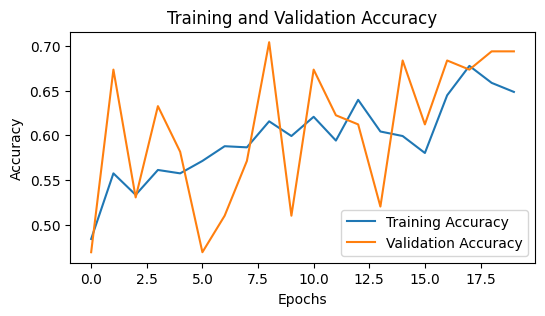

In [13]:
plt.figure(figsize=(6, 3))
plt.plot(ANN_history.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

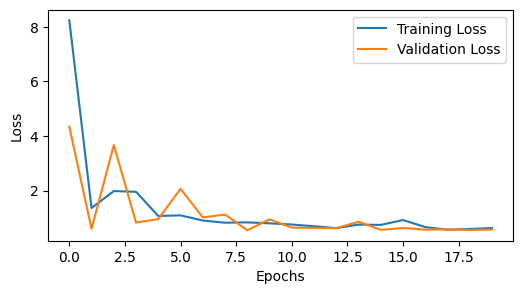

In [14]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(ANN_history.history['loss'], label='Training Loss')
plt.plot(ANN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Step 5: the CNN Model

##5.1Build the CNN MODEL
*   List item
*   List item


Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.



In [15]:
# Build the model
CNN_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

#5.2 Compile the Model

Compile your model by specifying the optimizer, loss function, and evaluation metrics.


In [16]:
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#5.3 Train the Model

Train your model using the training data and validate it using the validation data.


In [17]:
CNN_history = CNN_model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4862 - loss: 2.1731 - val_accuracy: 0.4694 - val_loss: 0.6961
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5054 - loss: 0.6942 - val_accuracy: 0.5306 - val_loss: 0.6811
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5710 - loss: 0.6811 - val_accuracy: 0.6122 - val_loss: 0.6599
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6103 - loss: 0.6489 - val_accuracy: 0.6633 - val_loss: 0.6396
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6452 - loss: 0.6260 - val_accuracy: 0.6735 - val_loss: 0.6038
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6502 - loss: 0.6235 - val_accuracy: 0.6837 - val_loss: 0.6042
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6684 - loss: 0.6150 - val_accuracy: 0.6122 - val_loss: 0.6182
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6878 - loss: 0.6138 - val_accuracy: 0.7041 - val_loss:

# 5.4 Evaluate the Model

Evaluate the performance of your model using the validation set.

In [18]:
# Evaluate the model
loss_cnn, accuracy_cnn = CNN_model.evaluate(testing_generator)
print(f'Loss: {loss_cnn}')
print(f'Accuracy: {accuracy_cnn}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.8344 - loss: 0.3517
Loss: 0.38109055161476135
Accuracy: 0.8100000023841858


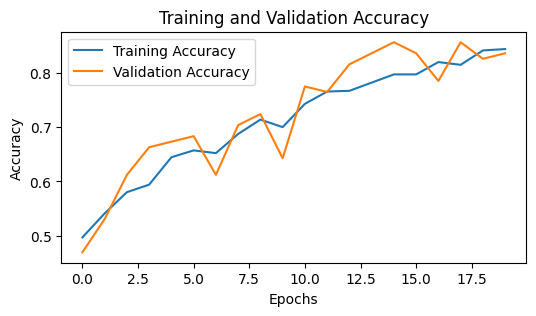

In [19]:
plt.figure(figsize=(6, 3))
plt.plot(CNN_history.history['accuracy'], label='Training Accuracy')
plt.plot(CNN_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

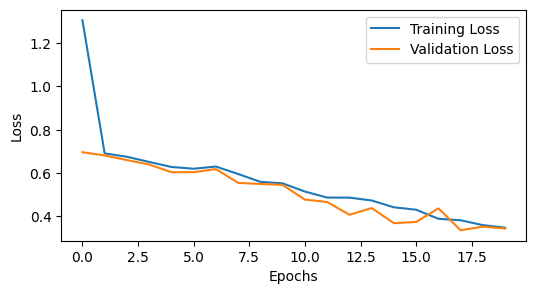

In [20]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(CNN_history.history['loss'], label='Training Loss')
plt.plot(CNN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## Step 6: the Improve Model

#6.1 Build the CNN_model_improvment
*   List item
*   List item


Define the architecture of your CNN_model_improvment. Start with convolutional layers followed by pooling layers, and end with fully connected layers.



In [26]:
# Build the model
CNN_model_improvment = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
CNN_model_improvment.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,857 (4.66 MB)

 Trainable params: 1,221,857 (4.66 MB)

 Non-trainable params: 0 (0.00 B)


#6.2 Compile the Model

Compile your model by specifying the optimizer, loss function, and evaluation metrics.



In [27]:
CNN_model_improvment.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#6.3 Train the Model

Train your model using the training data and validate it using the validation data.


In [28]:
CNN_impro_history = CNN_model_improvment.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5485 - loss: 0.7241 - val_accuracy: 0.5204 - val_loss: 0.6929
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5202 - loss: 0.6939 - val_accuracy: 0.5714 - val_loss: 0.6857
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5584 - loss: 0.6869 - val_accuracy: 0.6020 - val_loss: 0.6543
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5639 - loss: 0.6898 - val_accuracy: 0.6122 - val_loss: 0.6520
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6261 - loss: 0.6655 - val_accuracy: 0.6224 - val_loss: 0.6512
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6282 - loss: 0.6389 - val_accuracy: 0.6531 - val_loss: 0.6369
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6397 - loss: 0.6470 - val_accuracy: 0.6633 - val_loss: 0.5970
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6327 - loss: 0.6121 - val_accuracy: 0.6633 - val_loss:

# 6.4 Evaluate the Model

Evaluate the performance of your model using the validation set.

In [29]:
# Evaluate the model
loss_imp, accuracy_imp = CNN_model_improvment.evaluate(testing_generator)
print(f'Loss: {loss_imp}')
print(f'Accuracy: {accuracy_imp}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - accuracy: 0.8424 - loss: 0.3869
Loss: 0.4213756322860718
Accuracy: 0.8299999833106995


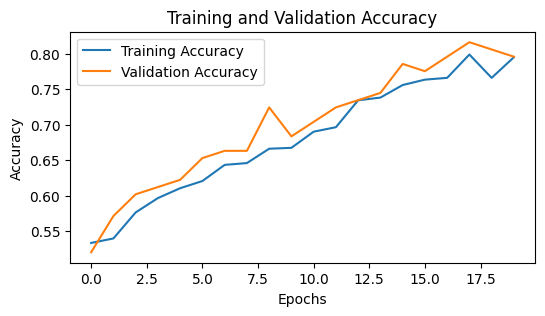

In [30]:
plt.figure(figsize=(6, 3))
plt.plot(CNN_impro_history.history['accuracy'], label='Training Accuracy')
plt.plot(CNN_impro_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

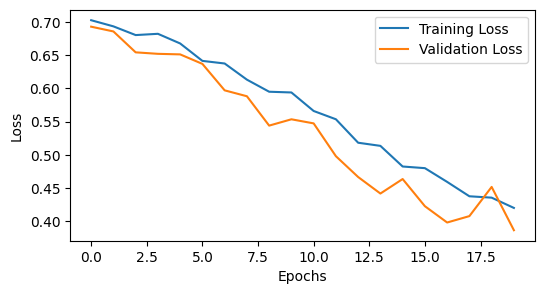

In [31]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(CNN_impro_history.history['loss'], label='Training Loss')
plt.plot(CNN_impro_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## Step 7: Image Prediction and Visualization

This step involves predicting the label of a single image using the improved CNN model and then displaying the image along with the predicted label.




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


<ipython-input-38-3e7d79005702>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = label_names[int(prediction[0] > 0.5)]


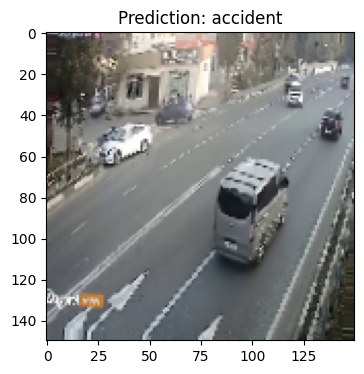

In [38]:
# to get a one image and label
images, labels = next(testing_generator)
prediction = CNN_model_improvment.predict(images) # predict using CNN improvement model
# Display the image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(images[0]) # first image

# get the predicted label
predicted_label = label_names[int(prediction[0] > 0.5)]
# show the prediction label
plt.title(f"Prediction: {predicted_label }")
plt.show()

##Step 8:Performance Comparison Between ANN, CNN, and Improved CNN

where the final performance of the three models (ANN, CNN, and Improved CNN) is compared using metrics such as loss and accuracy.

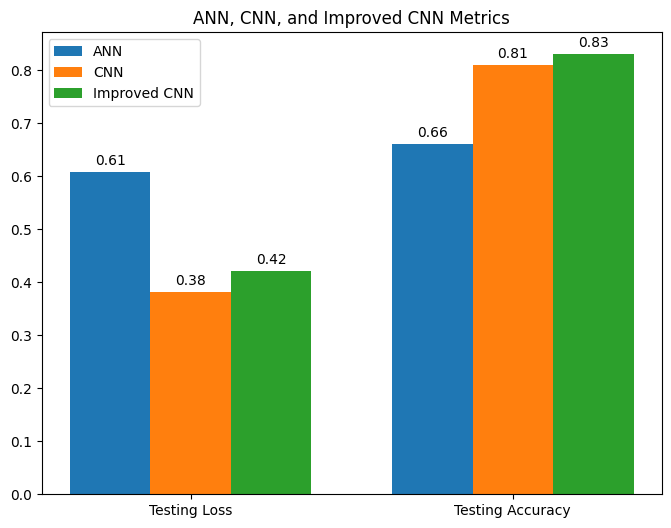

In [43]:
# Set width of bars
barWidth = 0.25
fig, ax = plt.subplots(figsize=(8, 6))

# Set values for each model
ann_values = [loss_ann, accuracy_ann]
cnn_values = [loss_cnn,accuracy_cnn]
cnn_imp_values = [loss_imp, accuracy_imp]

x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

# Plotting the bars
labels = ['Testing Loss', 'Testing Accuracy']

bars1 = ax.bar(x - width, ann_values, width, label='ANN')
bars2 = ax.bar(x, cnn_values, width, label='CNN')
bars3 = ax.bar(x + width, cnn_imp_values, width, label='Improved CNN')

# Adding labels, title, and custom x-axis tick labels
ax.set_title('ANN, CNN, and Improved CNN Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value labels on the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels to each set of bars
add_values(bars1)
add_values(bars2)
add_values(bars3)

plt.show()
